   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1      Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5    

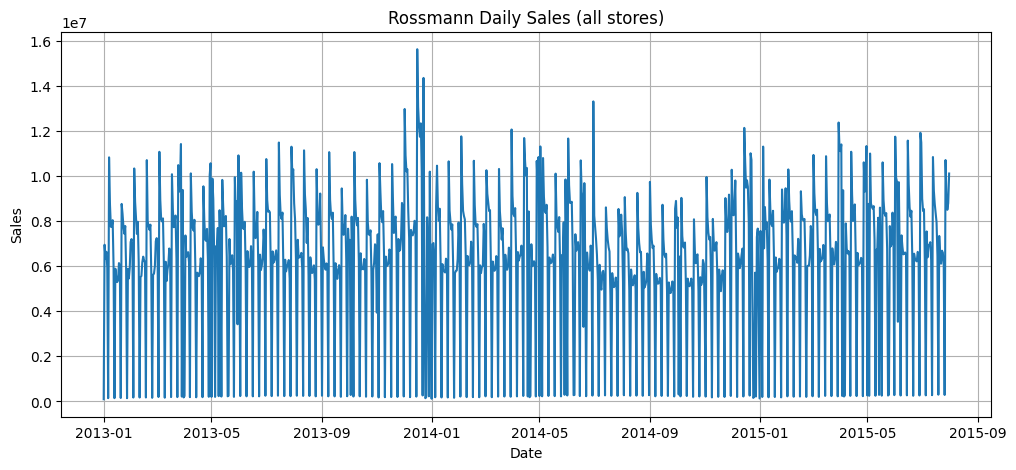

In [1]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import os

# 2. Load datasets
df_sales = pd.read_csv('../data/rossmann/train.csv', parse_dates=['Date'], dtype={'StateHoliday': str})

df_store = pd.read_csv('../data/rossmann/store.csv')
print(df_sales.head(), df_store.head())

# 3. Merge store info into sales
df = df_sales.merge(df_store, on='Store', how='left')

# 4. Filter to open stores only
df = df[df['Open'] == 1]

# 5. Aggregate daily sales overall
daily = df.groupby('Date')['Sales'].sum().reset_index()
daily.columns = ['ds', 'y']

# 6. Plot sales trend
plt.figure(figsize=(12, 5))
plt.plot(daily['ds'], daily['y'], label='Daily Sales')
plt.title('Rossmann Daily Sales (all stores)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
os.makedirs('../visuals', exist_ok=True)
plt.savefig('../visuals/rossmann_daily_sales.png')
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean
df_sales = pd.read_csv('../data/rossmann/train.csv', parse_dates=['Date'])
df_sales = df_sales.sort_values('Date')
df_sales = df_sales[df_sales['Open'] == 1]

# Aggregate to daily
daily_sales = df_sales.groupby('Date')['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']
daily_sales.head()


C:\Users\Dharn\AppData\Local\Temp\ipykernel_10108\3536284152.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv('../data/rossmann/train.csv', parse_dates=['Date'])


,ds,y
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593


In [8]:
pd.read_csv('../data/sales_forecast.csv').tail(10)


,ds,yhat,yhat_lower,yhat_upper
1022,2015-10-20,7.516387e+06,5.391878e+06,9.774714e+06
1023,2015-10-21,7.057556e+06,4.689210e+06,9.268703e+06
1024,2015-10-22,6.760054e+06,4.422567e+06,8.941584e+06
1025,2015-10-23,7.301025e+06,5.183502e+06,9.387452e+06
1026,2015-10-24,6.381993e+06,4.040399e+06,8.596439e+06
1027,2015-10-25,3.120043e+05,-1.701370e+06,2.615974e+06
1028,2015-10-26,8.549764e+06,6.234500e+06,1.075067e+07
1029,2015-10-27,7.700337e+06,5.411879e+06,1.016407e+07
1030,2015-10-28,7.234506e+06,5.082892e+06,9.534895e+06
1031,2015-10-29,6.925927e+06,4.545480e+06,9.104784e+06


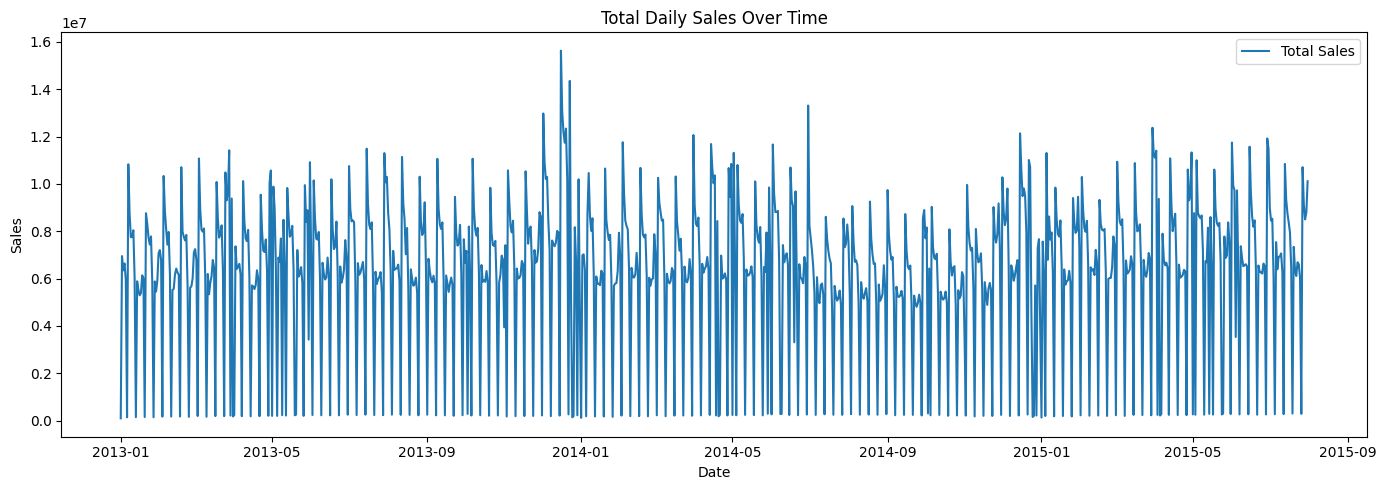

In [3]:
plt.figure(figsize=(14, 5))
plt.plot(daily_sales['ds'], daily_sales['y'], label='Total Sales')
plt.title('Total Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.savefig('../visuals/sales_trend.png')
plt.show()


In [2]:
import pandas as pd

df = pd.read_csv("../data/rossmann/train.csv", parse_dates=["Date"])
daily_sales = df.groupby("Date")["Sales"].sum().reset_index()
daily_sales.rename(columns={"Date": "ds", "Sales": "y"}, inplace=True)
daily_sales.to_csv("../data/actuals.csv", index=False)

print("✅ actuals.csv generated successfully!")


C:\Users\Dharn\AppData\Local\Temp\ipykernel_11740\813328559.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/rossmann/train.csv", parse_dates=["Date"])


✅ actuals.csv generated successfully!


In [5]:
from prophet import Prophet

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(daily_sales)


00:22:34 - cmdstanpy - INFO - Chain [1] start processing
00:22:35 - cmdstanpy - INFO - Chain [1] done processing


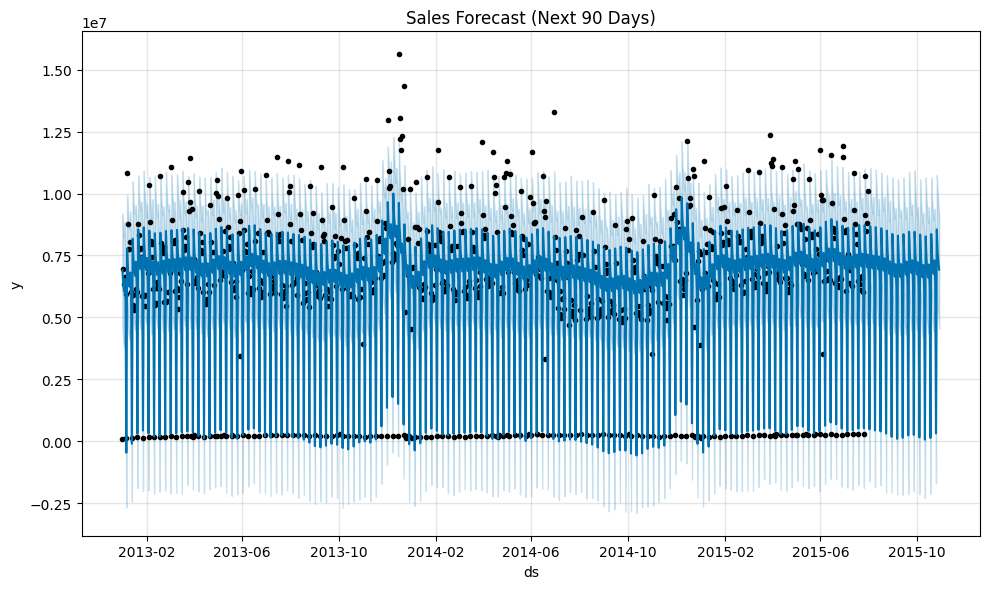

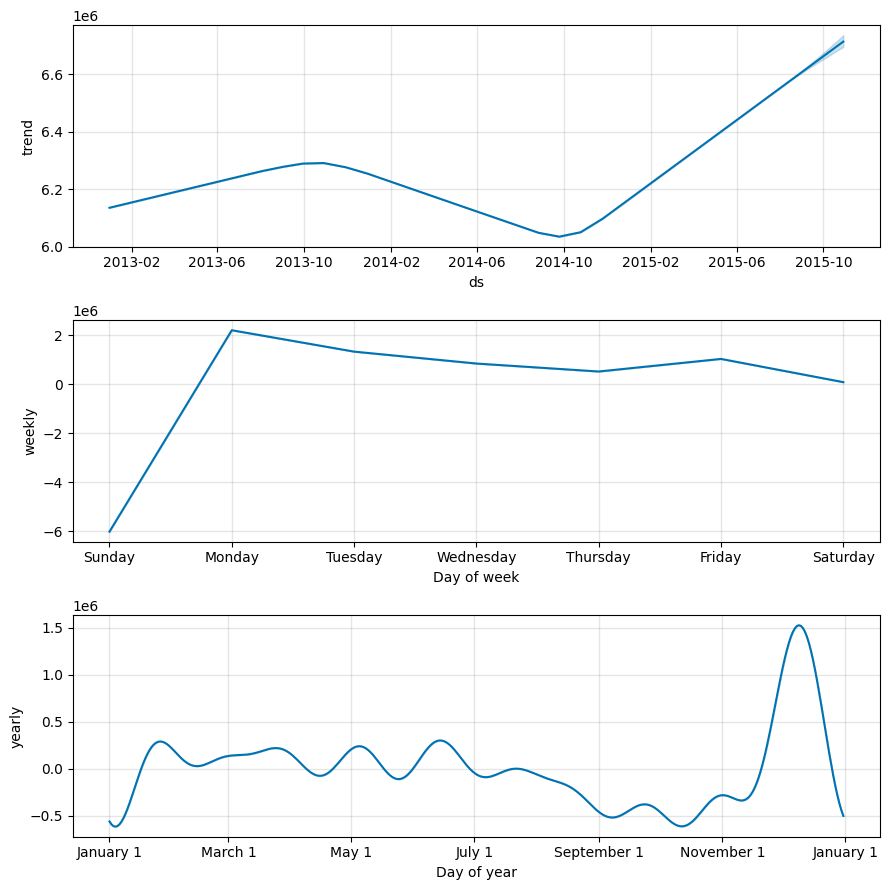

In [6]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Forecast plot
fig1 = model.plot(forecast)
plt.title("Sales Forecast (Next 90 Days)")
plt.tight_layout()
plt.savefig('../visuals/sales_forecast.png')
plt.show()

# Components plot
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.savefig('../visuals/forecast_components.png')
plt.show()


In [7]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('../data/sales_forecast.csv', index=False)
